<a href="https://colab.research.google.com/github/Shalinis19137/Ticket_Customer_Support____Celebal_6/blob/main/Ticket_Customer_Support.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries

Importing libraries in Python means loading external code (modules or packages) into your program so you can use predefined functions, classes, and tools. This helps you avoid writing code from scratch and speeds up development by reusing efficient, tested code

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


# Load your data

Load your data refers to the process of importing external datasets into your working environment (like Python, R, or Excel) so they can be analyzed or processed. This step is essential for any data science or machine learning task, as it allows you to work with real-world information stored in files such as CSV, Excel, or databases

In [ ]:
df = pd.read_csv("customer_support_tickets.csv")

# Drop rows with missing description or type

Dropping rows with missing description or type refers to the process of removing data entries from a dataset where either the 'description' or 'type' fields are empty or null. This helps ensure data quality and avoids errors in analysis or modeling

In [ ]:
df = df.dropna(subset=['Ticket Type', 'Ticket Description'])

# Encode target labels

Encode target labels refers to the process of converting categorical target variables (like class labels) into a numerical format so that machine learning algorithms can process them. This is commonly done using techniques like Label Encoding or One-Hot Encoding, depending on the model requirements

In [ ]:
le = LabelEncoder()
df['Ticket Type Encoded'] = le.fit_transform(df['Ticket Type'])

# Features and target

Features are the input variables or attributes used by a machine learning model to make predictions.
Target is the output variable or label that the model is trying to predict or classify based on the input features

In [ ]:
X = df['Ticket Description']
y = df['Ticket Type Encoded']


# Train/Test split

Train/Test Split is a method used in machine learning to evaluate a model’s performance. The dataset is divided into two parts: the training set, used to train the model, and the testing set, used to assess how well the model generalizes to unseen data. This helps prevent overfitting and ensures reliable performance evaluation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Logistic Regression


Logistic Regression is a statistical method used for binary classification that predicts the probability of an outcome belonging to a particular class (e.g., yes/no, 0/1). It uses the logistic (sigmoid) function to map predicted values between 0 and 1, making it ideal for tasks like spam detection or disease diagnosis

In [ ]:
pipeline_lr = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000))
])

param_grid_lr = {
    'clf__C': [0.1, 1, 10],
    'clf__penalty': ['l2'],
    'clf__solver': ['liblinear']
}

grid_lr = GridSearchCV(pipeline_lr, param_grid=param_grid_lr, cv=3, scoring='f1_weighted', n_jobs=-1)
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'clf__C': [0.1, 1, 10], 'clf__penalty': ['l2'],
                         'clf__solver': ['liblinear']},
             scoring='f1_weighted')


# Random Forest


Random Forest is an ensemble machine learning algorithm that builds multiple decision trees and merges their results to improve accuracy and prevent overfitting. It works well for both classification and regression tasks by averaging predictions in regression or taking the majority vote in classification

In [ ]:
pipeline_rf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])

param_dist_rf = {
    'clf__n_estimators': [50, 100],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5]
}

rand_rf = RandomizedSearchCV(pipeline_rf, param_distributions=param_dist_rf, n_iter=5, cv=3, scoring='f1_weighted', n_jobs=-1, random_state=42)
rand_rf.fit(X_train, y_train)


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                             ('clf',
                                              RandomForestClassifier())]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'clf__max_depth': [None, 10, 20],
                                        'clf__min_samples_split': [2, 5],
                                        'clf__n_estimators': [50, 100]},
                   random_state=42, scoring='f1_weighted')


# Evaluation


Evaluation is the process of assessing a model's performance by comparing its predictions with actual outcomes. It helps determine how well a machine learning model generalizes to new, unseen data. Common metrics include accuracy, precision, recall, and F1-score

In [ ]:
def evaluate(model, name):
    y_pred = model.predict(X_test)
    print(f"\n{name} Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

evaluate(grid_lr, "Logistic Regression (GridSearchCV)")
evaluate(rand_rf, "Random Forest (RandomizedSearchCV)")


Logistic Regression (GridSearchCV) Evaluation:
Accuracy: 0.19244391971664698
Precision: 0.18975183563204578
Recall: 0.19244391971664698
F1-Score: 0.19002790165140035

Classification Report:
                       precision    recall  f1-score   support

     Billing inquiry       0.16      0.11      0.13       357
Cancellation request       0.18      0.19      0.18       327
     Product inquiry       0.19      0.19      0.19       316
      Refund request       0.20      0.23      0.22       345
     Technical issue       0.22      0.24      0.23       349

            accuracy                           0.19      1694
           macro avg       0.19      0.19      0.19      1694
        weighted avg       0.19      0.19      0.19      1694


Random Forest (RandomizedSearchCV) Evaluation:
Accuracy: 0.21251475796930341
Precision: 0.20685589138848437
Recall: 0.21251475796930341
F1-Score: 0.20196177208285976

Classification Report:
                       precision    recall  f1-score   s


#  Confusion Matrix


A Confusion Matrix is a performance measurement tool for classification models. It summarizes prediction results by showing the counts of true positives, true negatives, false positives, and false negatives. This helps evaluate the model’s accuracy, precision, recall, and F1-score

#1. HeatMap

A heatmap is a data visualization technique that uses color to represent values in a matrix. It helps quickly identify patterns, correlations, and outliers within datasets, especially useful for showing relationships between variables in a correlation matrix

In [ ]:
# Load the data
df = pd.read_csv("customer_support_tickets.csv")
df = df.dropna(subset=['Ticket Type', 'Ticket Description'])

# Encode target
le = LabelEncoder()
df['Ticket Type Encoded'] = le.fit_transform(df['Ticket Type'])

# Split
X = df['Ticket Description']
y = df['Ticket Type Encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


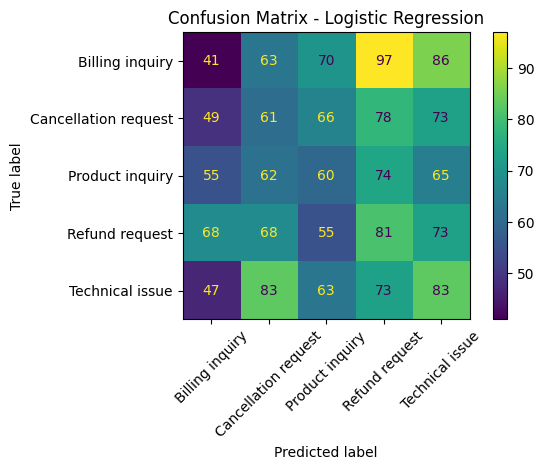

In [ ]:
pipeline_lr = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=1000))
])

pipeline_lr.fit(X_train, y_train)

ConfusionMatrixDisplay.from_estimator(
    pipeline_lr, X_test, y_test, display_labels=le.classes_, xticks_rotation=45
)
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()


#2. Barplot

A barplot is a graphical representation used to display the frequency, count, or other measures (like mean) of categorical data using rectangular bars. The length or height of each bar is proportional to the value it represents, making it easy to compare categories visually

In [ ]:
# Use the TF-IDF vectorizer from the trained pipeline (you can use rand_rf or grid_lr)
tfidf_vect = rand_rf.best_estimator_.named_steps['tfidf']

# Transform training data to get the TF-IDF matrix
tfidf_matrix = tfidf_vect.transform(X_train)

# Get feature names and average TF-IDF scores
feature_names = tfidf_vect.get_feature_names_out()
avg_tfidf = np.asarray(tfidf_matrix.mean(axis=0)).ravel()

# Get top N words
N = 20
top_indices = np.argsort(avg_tfidf)[-N:]
top_features = [feature_names[i] for i in top_indices]
top_scores = avg_tfidf[top_indices]

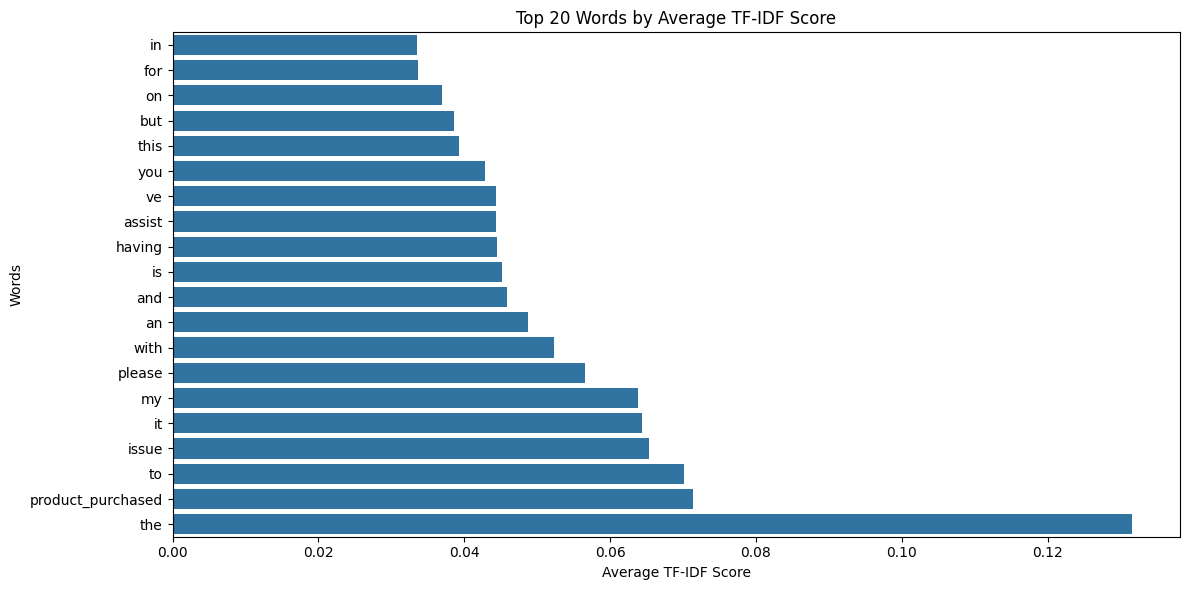

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_scores, y=top_features)
plt.title("Top 20 Words by Average TF-IDF Score")
plt.xlabel("Average TF-IDF Score")
plt.ylabel("Words")
plt.tight_layout()
plt.show()

#3. Matrices

Matrices are rectangular arrays of numbers or symbols arranged in rows and columns, used to represent and solve systems of linear equations. They are widely used in mathematics, physics, computer science, and data analysis for operations like transformations, rotations, and data storage

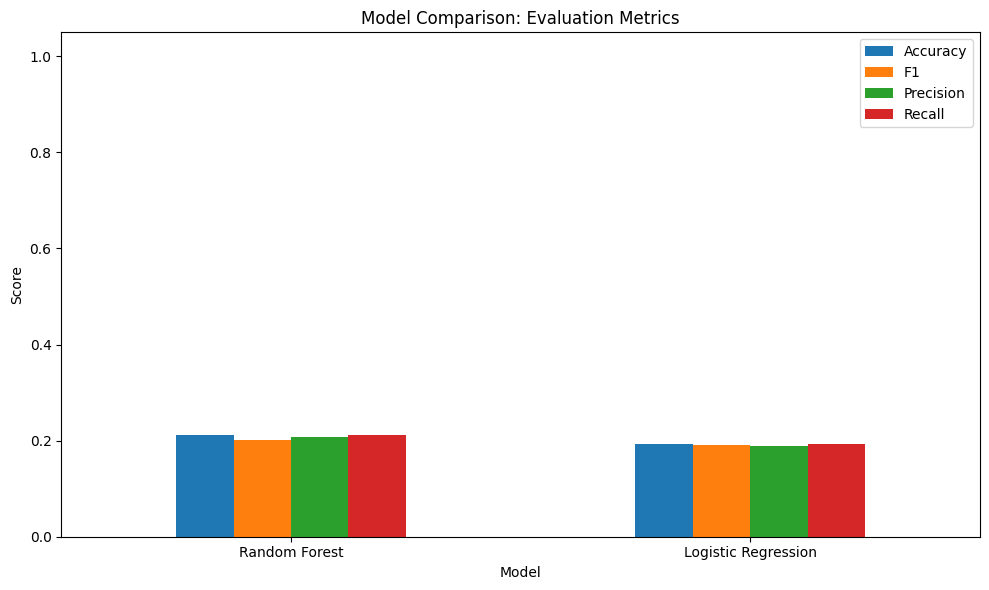

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def model_scores(model, name):
    y_pred = model.predict(X_test)
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred, average='weighted'),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted')
    }

scores_df = pd.DataFrame([
    model_scores(rand_rf, 'Random Forest'),
    model_scores(pipeline_lr, 'Logistic Regression')
])

scores_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title("Model Comparison: Evaluation Metrics")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


#4. Histogram

A histogram is a graphical representation of the distribution of numerical data. It uses bars to show the frequency of data within specified intervals or bins, helping to visualize patterns like skewness, central tendency, and spread

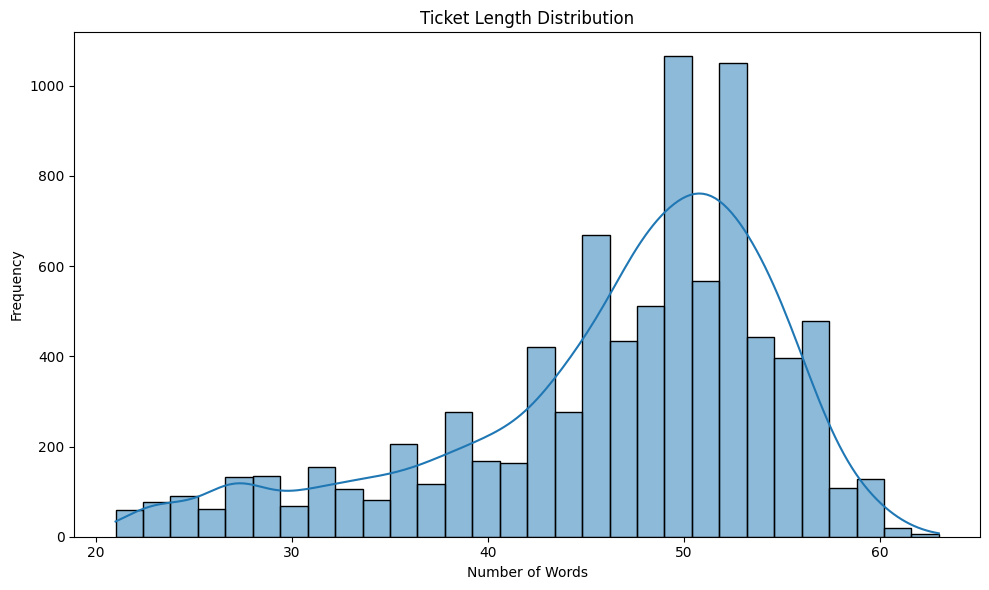

In [ ]:
df['ticket_length'] = df['Ticket Description'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(df['ticket_length'], bins=30, kde=True)
plt.title("Ticket Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()



# User Input Prediction



User Input Prediction refers to the process where a machine learning model analyzes and interprets user-provided data to make informed predictions or decisions. It helps personalize outputs or automate responses based on the user's input

In [ ]:
def predict_ticket_type(description, model, label_encoder):
    pred = model.predict([description])
    return label_encoder.inverse_transform(pred)[0]

# Example: Get input from the user
user_input = input("\nEnter your support query: ")

# Predict using both models
pred_lr = predict_ticket_type(user_input, grid_lr.best_estimator_, le)
pred_rf = predict_ticket_type(user_input, rand_rf.best_estimator_, le)

print("\n Predicted Ticket Type:")
print(f"Logistic Regression Prediction: {pred_lr}")
print(f"Random Forest Prediction: {pred_rf}")


Enter your support query: i did not get my tickets

 Predicted Ticket Type:
Logistic Regression Prediction: Refund request
Random Forest Prediction: Technical issue
